Importing all the dependencies

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
heart_data = pd.read_csv('/content/heart_data.csv')

In [14]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [16]:
heart_data.shape

(1025, 14)

In [17]:
heart_data['target'].value_counts()

,count
target,
1,526
0,499


In [18]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [19]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


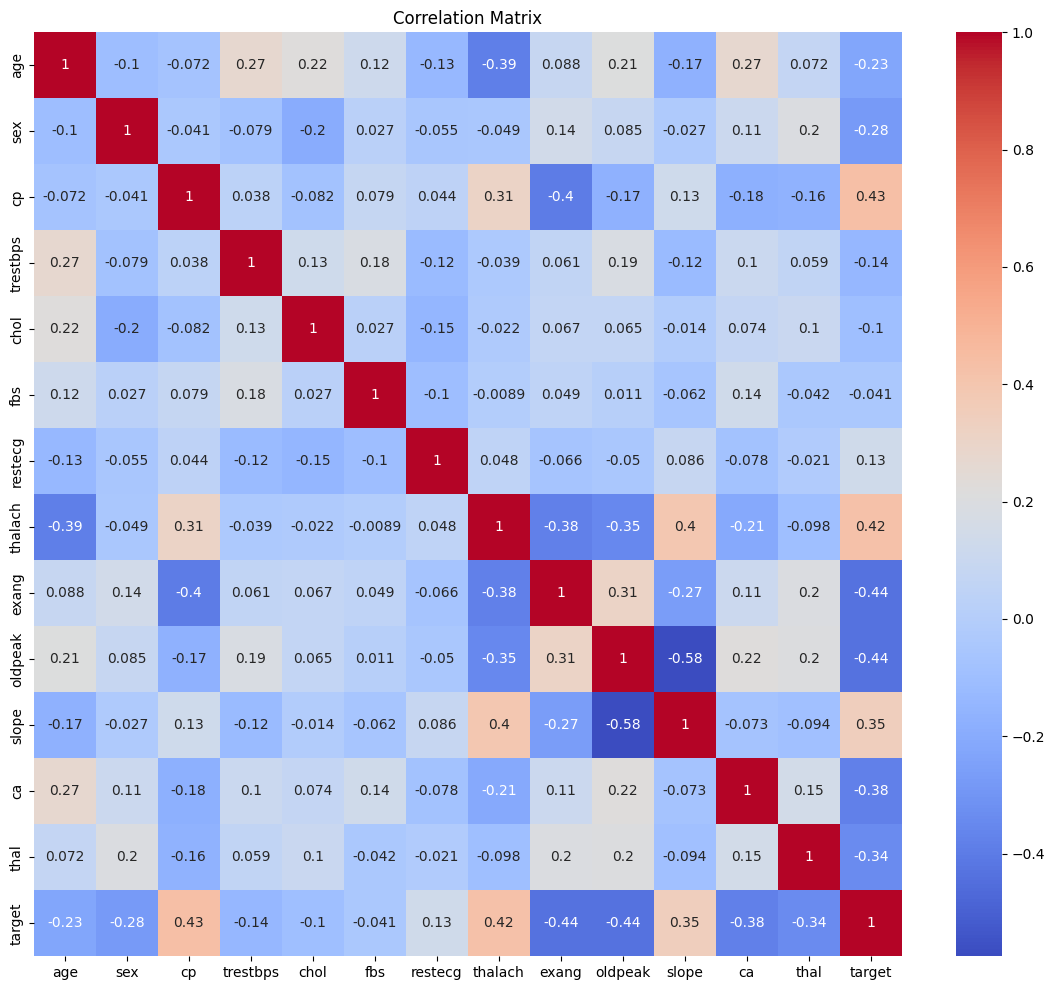

In [103]:
plt.figure(figsize=(14,12))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

1 --> defective heart, 0 --> healthy heart

In [20]:
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [22]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


Splitting the data in training and test data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1025, 13) (820, 13) (205, 13)
(1025,) (820,) (205,)


**Standardization**

In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
x_train

array([[ 0.16856381,  0.68138514,  0.06823285, ..., -2.23202634,
        -0.72853503, -0.52277804],
       [-0.27552399,  0.68138514,  1.04982822, ...,  0.98743118,
         3.12565027, -0.52277804],
       [-0.16450204,  0.68138514,  1.04982822, ...,  0.98743118,
         2.16210395, -0.52277804],
       ...,
       [ 0.05754186,  0.68138514, -0.91336252, ..., -0.62229758,
         0.2350113 ,  1.09487477],
       [ 0.05754186,  0.68138514, -0.91336252, ..., -0.62229758,
         0.2350113 ,  1.09487477],
       [ 0.83469552, -1.46759877, -0.91336252, ...,  0.98743118,
        -0.72853503, -0.52277804]])

**Model Training**

---
Here we are using logistic regression.


In [97]:
model = KNeighborsClassifier(n_neighbors=10)

In [98]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**Model Evaluation**

Using accuracy score for model evaluation

In [99]:
# accuracy on training data
y_train_predicted = model.predict(x_train)

training_data_accuracy = accuracy_score(y_train_predicted, y_train)

print("The Training Data Accuracy is : ", training_data_accuracy)

The Training Data Accuracy is :  0.8780487804878049


In [100]:
# accuracy on test data
y_test_predicted = model.predict(x_test)

test_data_accuracy = accuracy_score(y_test_predicted, y_test)

print("The Test Data Accuracy is : ", test_data_accuracy)

print(classification_report(y_test, y_test_predicted))

The Test Data Accuracy is :  0.8926829268292683
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.89      0.89      0.89       100

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



**Building a Predictive System**

In [84]:
input_data = (48,1,0,128,198,0,0,120,0,1.4,2,0,2)

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
input_data_df = pd.DataFrame([input_data], columns=feature_names)

new_prediction = model.predict(input_data_df)
print(new_prediction)

if (new_prediction[0] == 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
